In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs

C:\Users\ylinh\anaconda3\envs\nasa\lib\site-packages\pyproj\__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [2]:
ceres_global = xr.open_dataset('CERES_EBAF_Ed4.1_Subset_200107-200107.nc') # global one month data
ceres = xr.open_dataset('CERES_EBAF_Ed4.1_Subset_200003-202203.nc') # Arctic all-time data
ocn_fraction = np.loadtxt('water_one_degree.dat')
ocn_fraction = np.reshape(ocn_fraction, (180, 360))

lat = np.array(ceres_global['lat'])
lon = np.array(ceres_global['lon'])
lonGrid, latGrid = np.meshgrid(lon, lat)

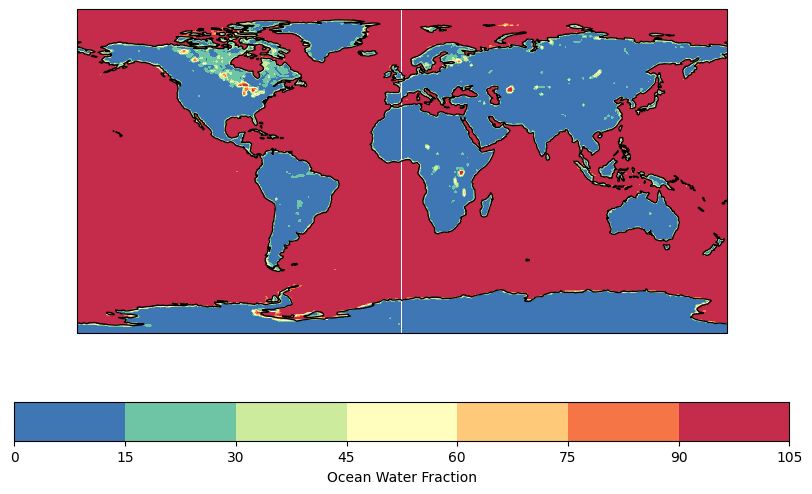

In [3]:
##  Check CERES and water ocean fraction match
fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.grid(True)

c1 = ax.contourf(lonGrid, latGrid, np.flip(ocn_fraction,axis=0), cmap='Spectral_r')
fig.colorbar(c1,label='Ocean Water Fraction', orientation='horizontal')
ax.coastlines()

ocn_fraction = np.flip(ocn_fraction,axis=0)

(30, 360)


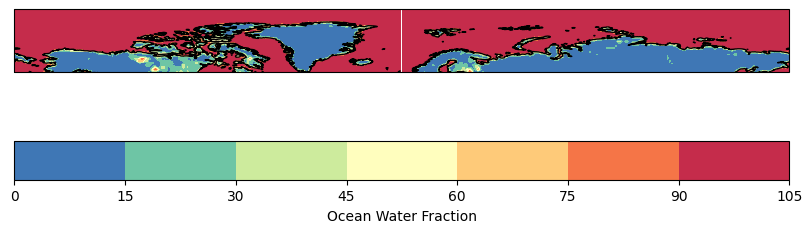

In [4]:
# Subset ocean water fraction above 60N
ocn_fraction = ocn_fraction[-30:,:]
print(ocn_fraction.shape)

# Use lat/lon coords from subsetted CERES Arctic data
lat = np.array(ceres['lat'])
lon = np.array(ceres['lon'])
lonGrid, latGrid = np.meshgrid(lon, lat)

fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.grid(True)

c1 = ax.contourf(lonGrid, latGrid, ocn_fraction, cmap='Spectral_r')
fig.colorbar(c1,label='Ocean Water Fraction', orientation='horizontal')
ax.coastlines()

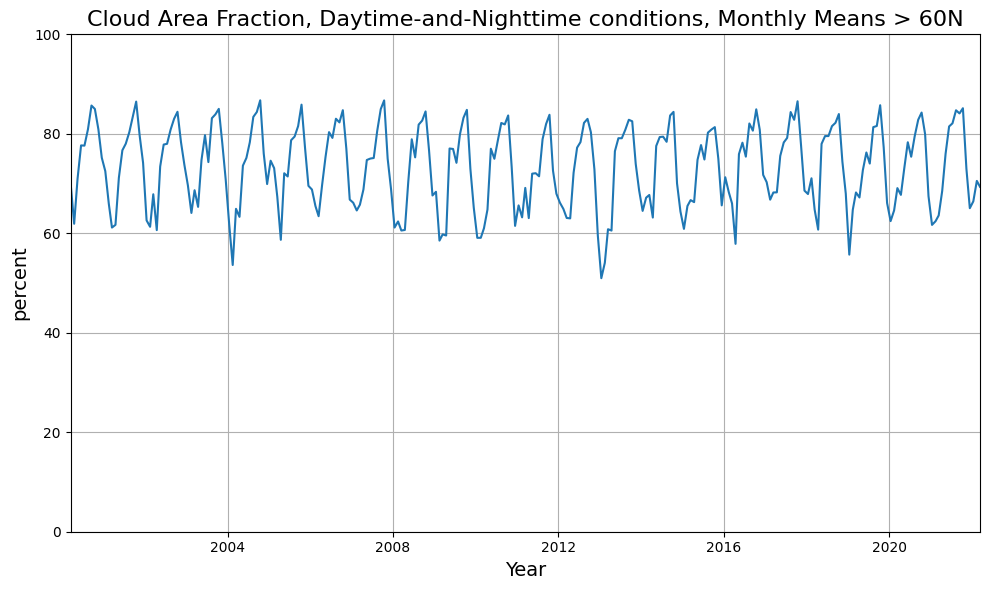

In [22]:
#### Average all data above 60N
var = 'cldarea_total_daynight_mon'
var_mean = np.average(ceres[var], axis=(1,2))

## Plotting
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.set_title(ceres[var].long_name+ ' > 60N', size=16)
ax.set_ylabel(ceres[var].units, size=14)
ax.set_xlabel('Year', size=14)
ax.set_xlim(ceres['time'][0],ceres['time'][-1])
ax.set_ylim(0,100)
plt.plot(ceres['time'], var_mean)
plt.grid()
plt.tight_layout()
plt.show()

(265,)


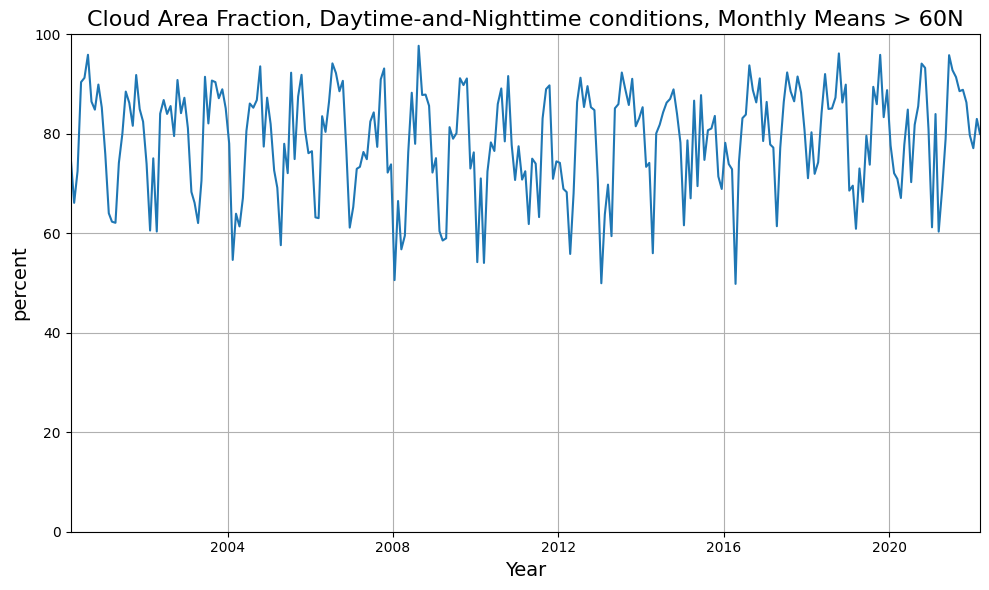

In [41]:
## Average all data above 60N weighted zonally
var = 'cldarea_total_daynight_mon'

weight = np.cos(latGrid)
var_mean = np.array([np.average(ceres[var][i], weights=weight) for i in range(len(ceres[var]))])
print(var_mean.shape)

## Plotting
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.set_title(ceres[var].long_name+ ' > 60N', size=16)
ax.set_ylabel(ceres[var].units, size=14)
ax.set_xlabel('Year', size=14)
ax.set_xlim(ceres['time'][0],ceres['time'][-1])
ax.set_ylim(0,100)
plt.plot(ceres['time'], var_mean)
plt.grid()
plt.tight_layout()
plt.show()

(265,)


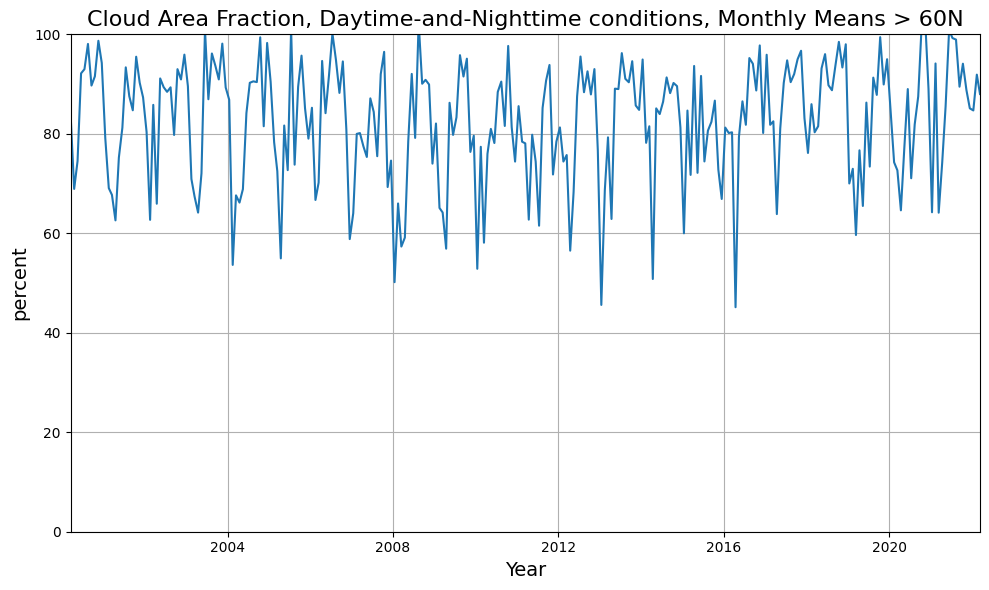

In [40]:
## Average all data above 60N weighted zonally * ocn fraction
var = 'cldarea_total_daynight_mon'

weight = np.cos(latGrid)*ocn_fraction
var_mean = np.array([np.average(ceres[var][i], weights=weight) for i in range(len(ceres[var]))])
print(var_mean.shape)

## Plotting
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.set_title(ceres[var].long_name+ ' > 60N', size=16)
ax.set_ylabel(ceres[var].units, size=14)
ax.set_xlabel('Year', size=14)
ax.set_xlim(ceres['time'][0],ceres['time'][-1])
ax.set_ylim(0,100)
plt.plot(ceres['time'], var_mean)
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
## Average 12 variables above 60N weighted zonally * ocn fraction
var_list = []

weight = np.cos(latGrid)*ocn_fraction
var_mean = np.zeros(12, 265)
for i, var in enumerate(var_list):
    var_mean[:] = np.array([np.average(ceres[var][i], weights=weight) for i in range(len(ceres[var]))])
    print('Average found for ', var)

## Plotting
# fig, ax = plt.subplots((12,1), figsize=(10, 6))
# ax.set_title(ceres[var].long_name+ ' > 60N', size=16)
# ax.set_ylabel(ceres[var].units, size=14)
# ax.set_xlabel('Year', size=14)
# ax.set_xlim(ceres['time'][0],ceres['time'][-1])
# ax.set_ylim(0,100)
# plt.plot(ceres['time'], var_mean)
# plt.grid()
# plt.tight_layout()
# plt.show()